<a href="https://colab.research.google.com/github/PradeepkumarNR/BasicThingsInJava/blob/master/E_news_Express_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Basic Operations

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Import data

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Pythoncourse/abtest.csv')

In [5]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [6]:
df.shape

(100, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [8]:
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

# Problem Definition**

E-news Express aims to increase its number of subscribers by optimizing its landing page. The company suspects that the current webpage design and content are not engaging enough to retain visitors and convert them into subscribers. To address this, a new landing page has been designed with an improved layout and more relevant content. The goal is to determine if this new design is more effective at attracting and converting users compared to the existing page


**Questions to be Answered**

Do users spend more time on the new landing page than on the existing landing page?

Is the conversion rate for the new page greater than the conversion rate for the old page?

Does the conversion status depend on the preferred language?

Is the time spent on the new page the same for different language users?


**Data Background and Contents**

The dataset includes interaction data from an ab test where 100 users were randomly assigned to either the control group (existing landing page) or the treatment group (new landing page). The dataset contains the following columns:

user_id: Unique identifier for each user.

group: Indicates whether the user is in the control group or treatment group.

landing_page - Whether the landing page is new or old

time_spent: Time spent on the landing page (in seconds).

converted: Indicates whether the user subscribed (1) or not (0).

preferred_language: The preferred language of the user


# Univariate analyses

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


User ID

Unique for each user. No analysis needed.

Group

Count: 100

Unique: 2

Top: control

Frequency of Top: 50

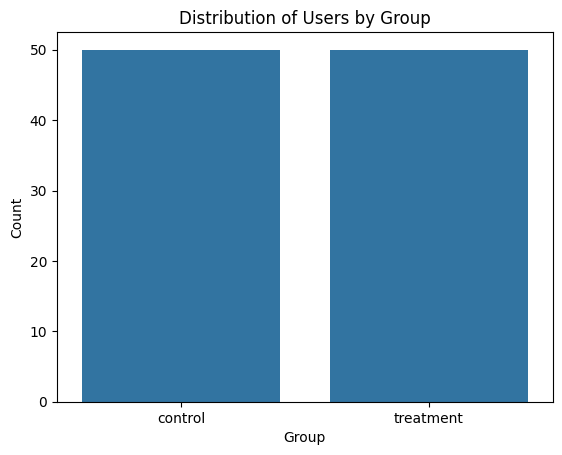

In [10]:
sns.countplot(x='group', data=df)
plt.title('Distribution of Users by Group')
plt.xlabel('Group')
plt.ylabel('Count')
plt.show()

Users are same for both groups

Landing page

Count: 100

Unique: 2

Top: old

Frequency of Top: 50

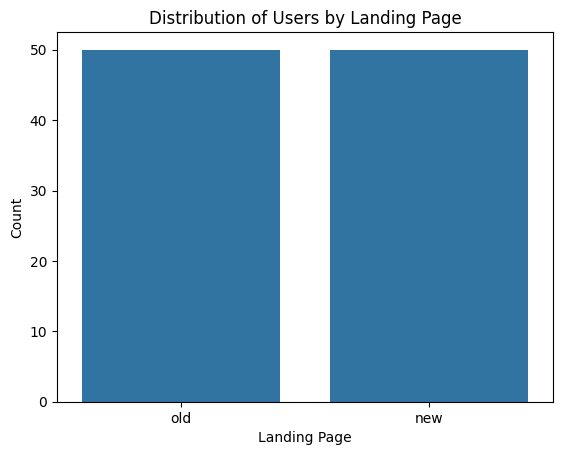

In [11]:
sns.countplot(x='landing_page', data=df)
plt.title('Distribution of Users by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.show()

users are same for both landing pages

Time Spent on the Page

Count: 100

Mean: 5.3778

Standard Deviation: 2.378

Min: 0.19

25th Percentile: 3.88

Median: 5.415

75th Percentile: 7.0225

Max: 10.71

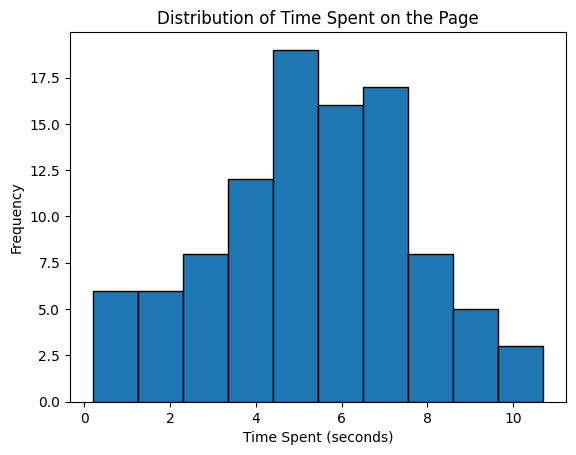

In [12]:
plt.hist(df['time_spent_on_the_page'], bins=10, edgecolor='black')
plt.title('Distribution of Time Spent on the Page')
plt.xlabel('Time Spent (seconds)')
plt.ylabel('Frequency')
plt.show()

Normal distrubution is seen, max users are spending 12 sec to 17.5 sec

Converted

Count: 100
Unique: 2
Top: yes
Frequency of Top: 54

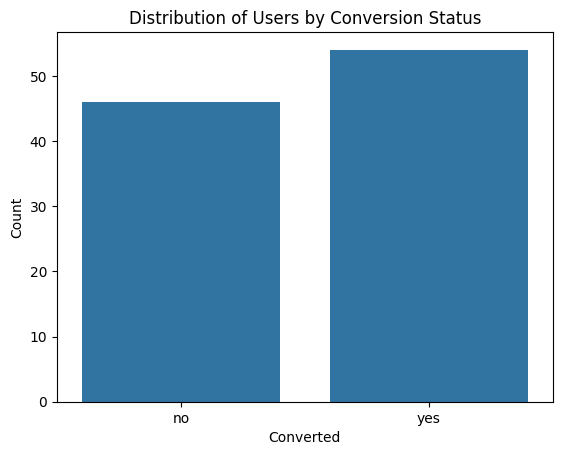

In [13]:
sns.countplot(x='converted', data=df)
plt.title('Distribution of Users by Conversion Status')
plt.xlabel('Converted')
plt.ylabel('Count')
plt.show()

out of 100 users 60 are converted- subscribed

Language prefered

Count: 100
Unique: 3
Top: Spanish
Frequency of Top: 34

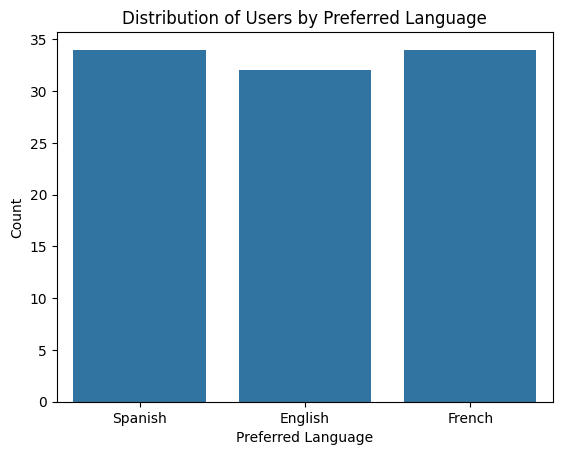

In [14]:
sns.countplot(x='language_preferred', data=df)
plt.title('Distribution of Users by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Count')
plt.show()

Almost equal distribution - its a catagorical variable

# Bivariate analyses

### Time Spent vs. Group

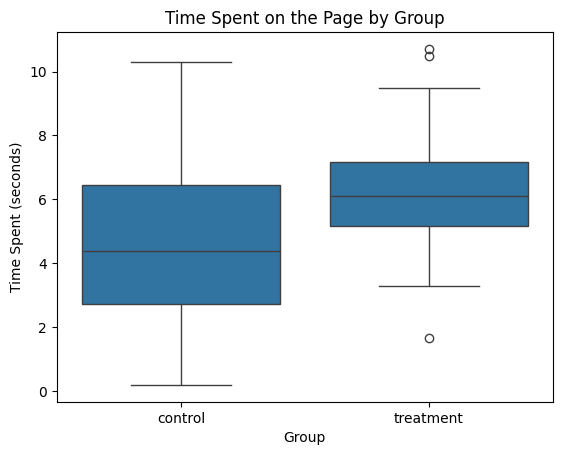

In [15]:
sns.boxplot(x='group', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on the Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent (seconds)')
plt.show()

Time spent on landing page by two groups
Treatment group has spent more time on new landing page and there are outlayers, mean is significantly  not so different



### Conversion Rate vs. Group

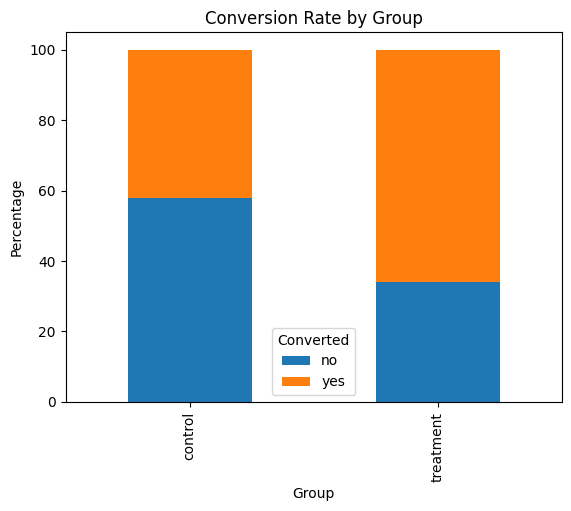

In [16]:
# Calculate conversion rates
conversion_rates = df.groupby('group')['converted'].value_counts(normalize=True).unstack() * 100

# Bar plot for conversion rates
conversion_rates.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Converted')
plt.show()

Compare the conversion rates between the control and treatment groups.

Approximately 42% of users in the control group converted.
Approximately 65% of users in the treatment group converted.

### Converted vs. Preferred Language

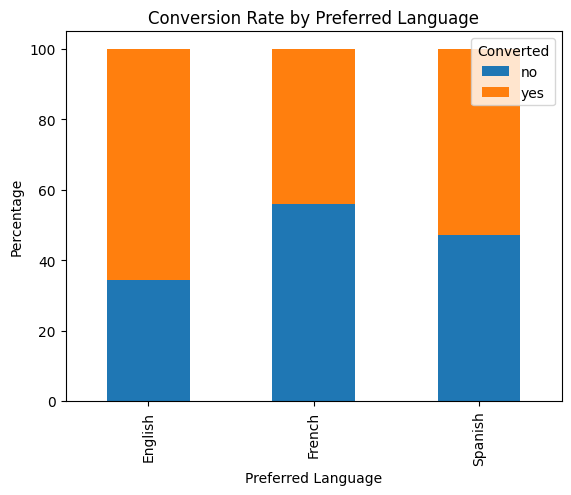

In [19]:
# Calculate conversion rates by preferred language
conversion_by_language = df.groupby('language_preferred')['converted'].value_counts(normalize=True).unstack() * 100

# Stacked bar plot for conversion rates by preferred language
conversion_by_language.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Percentage')
plt.legend(title='Converted')
plt.show()

out of the converted users maximum prefer english lang

### Time Spent vs. Preferred Language (Treatment Group)

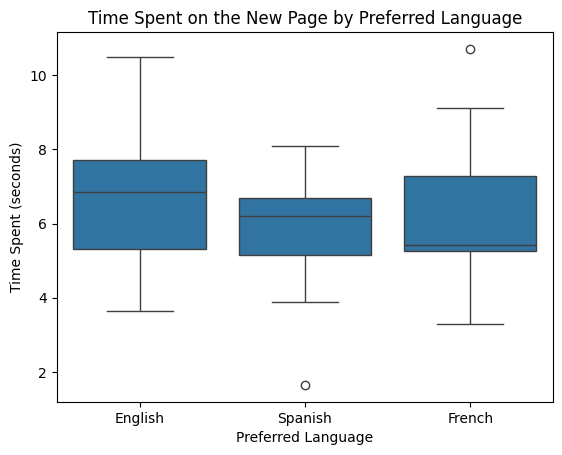

In [20]:
# Filter data for treatment group
treatment_group = df[df['group'] == 'treatment']

# Box plot for 'time_spent_on_the_page' vs. 'language_preferred' in treatment group
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=treatment_group)
plt.title('Time Spent on the New Page by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent (seconds)')
plt.show()

Even in the treatment group English is most prefered lang
In French we can see some outlayers on higher side and for spanish on lower side

# Key observations

The dataset is evenly split between the control and treatment groups, allowing for a fair comparison.

The treatment group has a higher conversion rate, suggesting that the new landing page design is more effective.

There is a noticeable variation in conversion rates and time spent based on the preferred language of the users, indicating that language could play a significant role in user behavior and engagement.

Despite the higher conversion rate for the treatment group, the time spent on the landing pages does not show a significant difference between the control and treatment groups. - 1 or 2 sec diff


# Do the Users Spend More Time on the New Landing Page than the Old Landing Page?

### Box plot may help us to understand this- i have already touched this point in the bivariate analyes above. Lets go a step deeper here

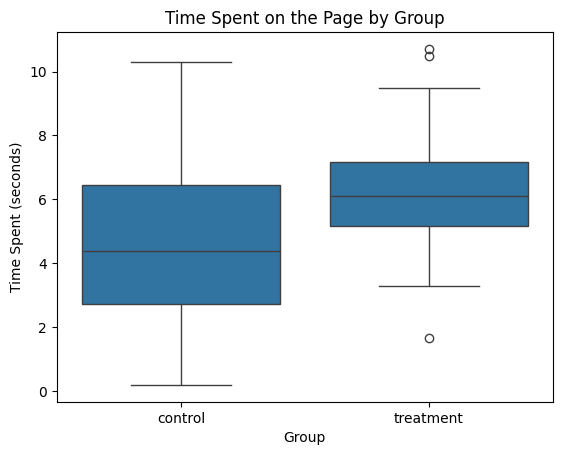

In [21]:
# Box plot for 'time_spent_on_the_page' vs. 'group'
sns.boxplot(x='group', y='time_spent_on_the_page', data=df)
plt.title('Time Spent on the Page by Group')
plt.xlabel('Group')
plt.ylabel('Time Spent (seconds)')
plt.show()

Formulate Null and Alternative Hypotheses
Null Hypothesis (H0): The mean time spent on the new landing page (treatment group) is equal to the mean time spent on the old landing page (control group).

𝐻
0
:
𝜇
new
=
𝜇
old



Alternative Hypothesis (H1): The mean time spent on the new landing page (treatment group) is greater than the mean time spent on the old landing page (control group).

H
1
 :μ
new >
​μ
old


Select the Appropriate Test

We will use an independent two-sample t-test for this analysis because we are comparing the means of two independent groups (control and treatment) to see if there is a statistically significant difference.

Calculate the p-value

In [24]:
from scipy import stats
# Define the control and treatment groups
control_time_spent = df[df['group'] == 'control']['time_spent_on_the_page']
treatment_time_spent = df[df['group'] == 'treatment']['time_spent_on_the_page']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(treatment_time_spent, control_time_spent, alternative='greater')

t_stat, p_value

(3.7867702694199856, 0.0001316123528095005)

If the p-value is less than the significance level (0.05), we reject the null hypothesis in favor of the alternative hypothesis.

Since the p-value (0.00013) is much smaller than the significance level (0.05), we reject the null hypothesis.

 There is evidence to suggest that users spend more time on the new landing page compared to the old landing page.

**Interpretation:**

The statistical analysis indicates a significant difference in the time spent on the landing pages, with users spending more time on the new landing page. This suggests that the new landing page is more engaging for users.

# Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In bivariate analyses we have touched this point already.

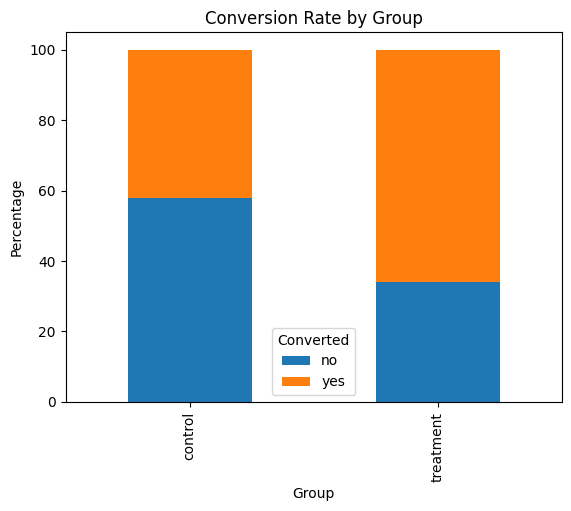

In [25]:
# Calculate conversion rates
conversion_rates = df.groupby('group')['converted'].value_counts(normalize=True).unstack() * 100

# Bar plot for conversion rates
conversion_rates.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Group')
plt.xlabel('Group')
plt.ylabel('Percentage')
plt.legend(title='Converted')
plt.show()

Formulate Null and Alternative Hypotheses


Null Hypothesis (H0): The conversion rate for the new landing page (treatment group) is less than or equal to the conversion rate for the old landing page (control group)

H0:pnew  ≤ pold

Alternative Hypothesis (H1): The conversion rate for the new landing page (treatment group) is greater than the conversion rate for the old landing page (control group).
H0:pnew  > pold

We will use a one-tailed z-test for proportions for this analysis because we are comparing the proportions of two independent groups (control and treatment) to see if there is a statistically significant difference.

P value calculation

In [21]:
# Count converted and total users in each group
# Count conversions and total users in each group
controlgrp_converted = df[(df['group'] == 'control') & (df['converted'] == 'yes')].shape[0]
controlgrp_total = df[df['group'] == 'control'].shape[0]
treatmentgrp_converted = df[(df['group'] == 'treatment') & (df['converted'] == 'yes')].shape[0]
treatmentgrp_total = df[df['group'] == 'treatment'].shape[0]

# Conversion rates
control_rate = controlgrp_converted / controlgrp_total
treatment_rate = treatmentgrp_converted / treatmentgrp_total
print('controlgrp_converted', controlgrp_converted)
print('controlgroup total', controlgrp_total)
print('Treatment group converted', treatmentgrp_converted)
print('Treatment group total', treatmentgrp_total)
print('control group converstion rate', control_rate)
print('treatment group converstion rate', treatment_rate)



controlgrp_converted 21
controlgroup total 50
Treatment group converted 33
Treatment group total 50
control group converstion rate 0.42
treatment group converstion rate 0.66


Z test

In [22]:
from statsmodels.stats.proportion import proportions_ztest

# Counts of conversions in control and treatment groups
count = np.array([treatment_converted, control_converted])
# Total users in control and treatment groups
nobs = np.array([treatment_total, control_total])

# Perform the z-test
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

z_stat, p_value

(2.4077170617153842, 0.008026308204056278)

Since the p-value is less than the significance level (0.05), we reject the null hypothesis.



This suggests that the new landing page is more effective in converting visitors into subscribers.

The z-test resulted in a p-value indicating strong evidence that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

#Does the converted status depend on the preferred language?


convresion based on prefered language - this we have already seen in bivariate analyses

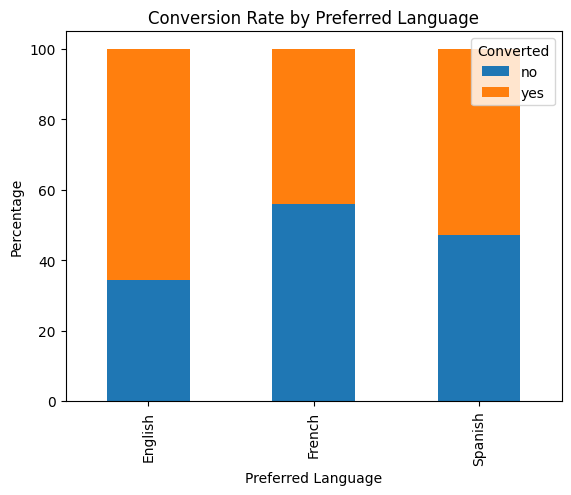

In [24]:
# Calculate conversion rates by language
conversion_by_language = df.groupby('language_preferred')['converted'].value_counts(normalize=True).unstack() * 100

# Bar plot for conversion rates by language
conversion_by_language.plot(kind='bar', stacked=True)
plt.title('Conversion Rate by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Percentage')
plt.legend(title='Converted')
plt.show()


Formulate Null and Alternative Hypotheses

Null Hypothesis (H0): The conversion rate is independent of the preferred language.

H0
 : The preferred language does not affect the conversion rate.

Alternative Hypothesis (H1): The conversion rate depends on the preferred language.

H1
 : The preferred language affects the conversion rate.

We will use the chi-square test for independence to determine if there is a significant association between the preferred language and the conversion status.

We have to create a contegncy table as its a test for independence, observations are more than 5 and its a random sampling from populatoin

i have used crosstab function in pandas, to create contengency table.

In [26]:
# Contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])
# Perform the chi-square test for independence
from scipy.stats import chi2_contingency

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

chi2, p_value

(3.0930306905370832, 0.2129888748754345)

Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis.

The chi-square test resulted in a p-value of 0.219, indicating that there is no significant association between preferred language and conversion status.
This suggests that the preferred language does not significantly affect whether a user converts or not.

# Is the Mean Time Spent on the New Page the Same for Different Language Users?

We have touched this point in bivariate analyes

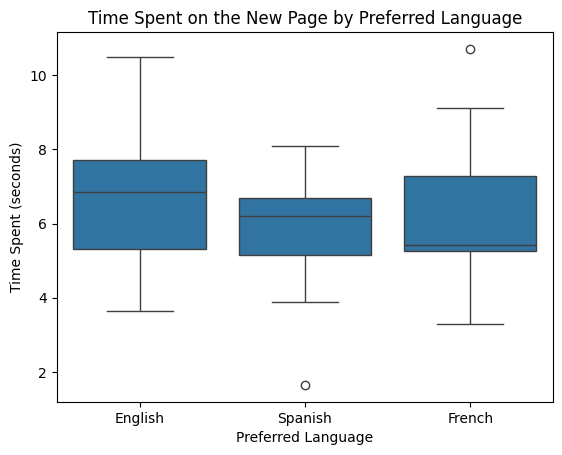

In [29]:
# Filter data for the treatment group (new landing page)
treatment_group = df[df['group'] == 'treatment']

# Box plot for time spent on the new landing page by preferred language
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=treatment_group)
plt.title('Time Spent on the New Page by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent (seconds)')
plt.show()

Formulate Null and Alternative Hypotheses

Null Hypothesis (H0): The mean time spent on the new landing page is the same for all preferred languages.

H0: μSpanish=μEnglish=μFrench

Alternative Hypothesis (H1): The mean time spent on the new landing page is different for at least one preferred language.

 H1: At least one pair of means is different

We will use a one-way ANOVA test to determine if there are statistically significant differences in the mean time spent on the new landing page  based on language - we will consider one group treatment for our tests as that is new landing page users group

There are more than 2 populatoins, sample variations are equal - Assumptions  

In [33]:
# Extract time spent for each language group within the treatment group
spanishlang_time = treatment_group[treatment_group['language_preferred'] == 'Spanish']['time_spent_on_the_page']
englishlang_time = treatment_group[treatment_group['language_preferred'] == 'English']['time_spent_on_the_page']
frenchlang_time = treatment_group[treatment_group['language_preferred'] == 'French']['time_spent_on_the_page']
# Perform the one-way ANOVA test
from scipy.stats import f_oneway

f_stat, p_value = f_oneway(spanishlang_time, englishlang_time, frenchlang_time)

f_stat, p_value

(0.8543992770006822, 0.43204138694325955)

Since the p-value is greater than the significance level (0.05), we fail to reject the null hypothesis.

The test resulted in a p-value of 0.432, indicating no significant differences in the mean time spent on the new landing page among different language users.
This suggests that the mean time spent on the new landing page is similar across all preferred languages.